In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 87% 129M/149M [00:00<00:00, 245MB/s]
100% 149M/149M [00:00<00:00, 257MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/brain-tumor-mri-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout,Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras import Sequential

In [7]:
import tensorflow as tf
train_df=tf.keras.utils.image_dataset_from_directory(
    directory='/content/Training',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5712 files belonging to 4 classes.


In [8]:
test_df=tf.keras.utils.image_dataset_from_directory(
    directory='/content/Testing',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 1311 files belonging to 4 classes.


In [9]:
def process(image,labels):
  image=tf.cast(image/255,tf.float32)
  return image,labels

In [10]:
train_df=train_df.map(process)
test_df=test_df.map(process)

In [11]:
from tensorflow.keras import regularizers

In [15]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))
model.add(Conv2D(64,(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))
model.add(Conv2D(128,(3,3),activation='relu',padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 460800)           

In [17]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics='accuracy')

In [18]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [23]:
history=model.fit(train_df,epochs=5,callbacks=early_stopping,validation_data=train_df)

Epoch 1/5
179/179 [==============================] - 1141s 6s/step - loss: 0.6767 - accuracy: 0.8867 - val_loss: 0.5404 - val_accuracy: 0.9307
Epoch 2/5
179/179 [==============================] - 1175s 7s/step - loss: 0.6510 - accuracy: 0.8957 - val_loss: 0.5081 - val_accuracy: 0.9315
Epoch 3/5
179/179 [==============================] - 1155s 6s/step - loss: 0.6587 - accuracy: 0.8955 - val_loss: 0.5086 - val_accuracy: 0.9336
Epoch 4/5
179/179 [==============================] - 1117s 6s/step - loss: 0.5574 - accuracy: 0.9107 - val_loss: 0.4715 - val_accuracy: 0.9315
Epoch 5/5
179/179 [==============================] - 1154s 6s/step - loss: 0.5954 - accuracy: 0.9020 - val_loss: 0.4987 - val_accuracy: 0.9338


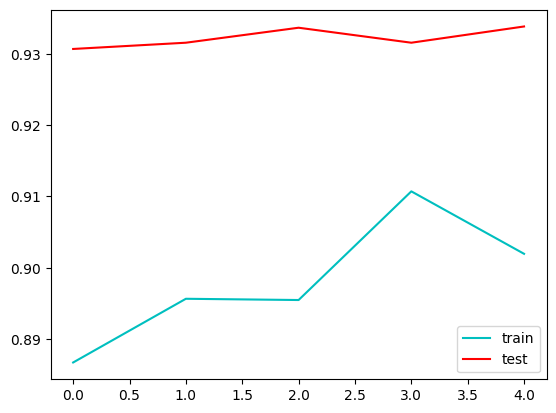

In [24]:


plt.plot(history.history['accuracy'],color='c',label='train')
plt.plot(history.history['val_accuracy'],color='r',label='test')
plt.legend()
plt.show()


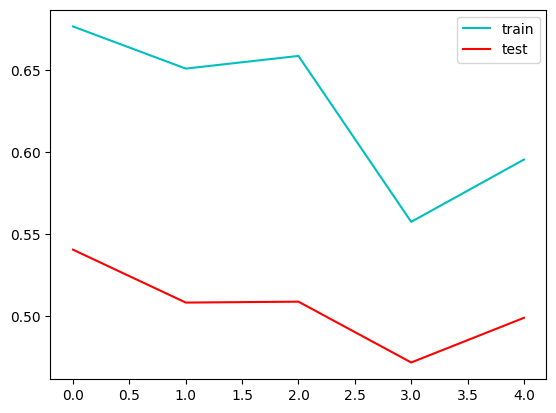

In [25]:

plt.plot(history.history['loss'],color='c',label='train')
plt.plot(history.history['val_loss'],color='r',label='test')
plt.legend()
plt.show()